In [1]:
from datasets import load_dataset


ds = load_dataset('beans')
ds

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [4]:
ex = ds['train'][400]
ex

{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/bean_rust/bean_rust_train.148.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 1}

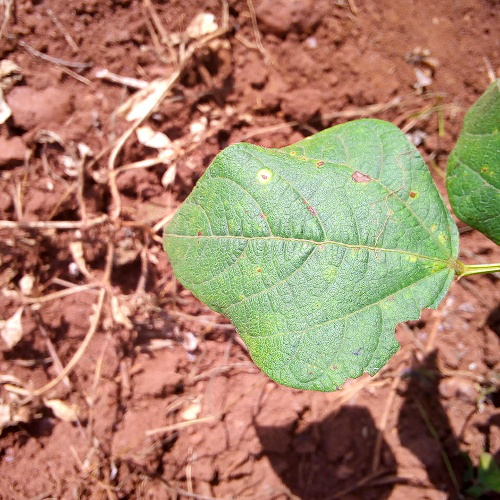

In [5]:
image = ex['image']
image

In [6]:
labels = ds['train'].features['labels']
labels

ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)

In [7]:
labels.int2str(ex['labels'])

'bean_rust'

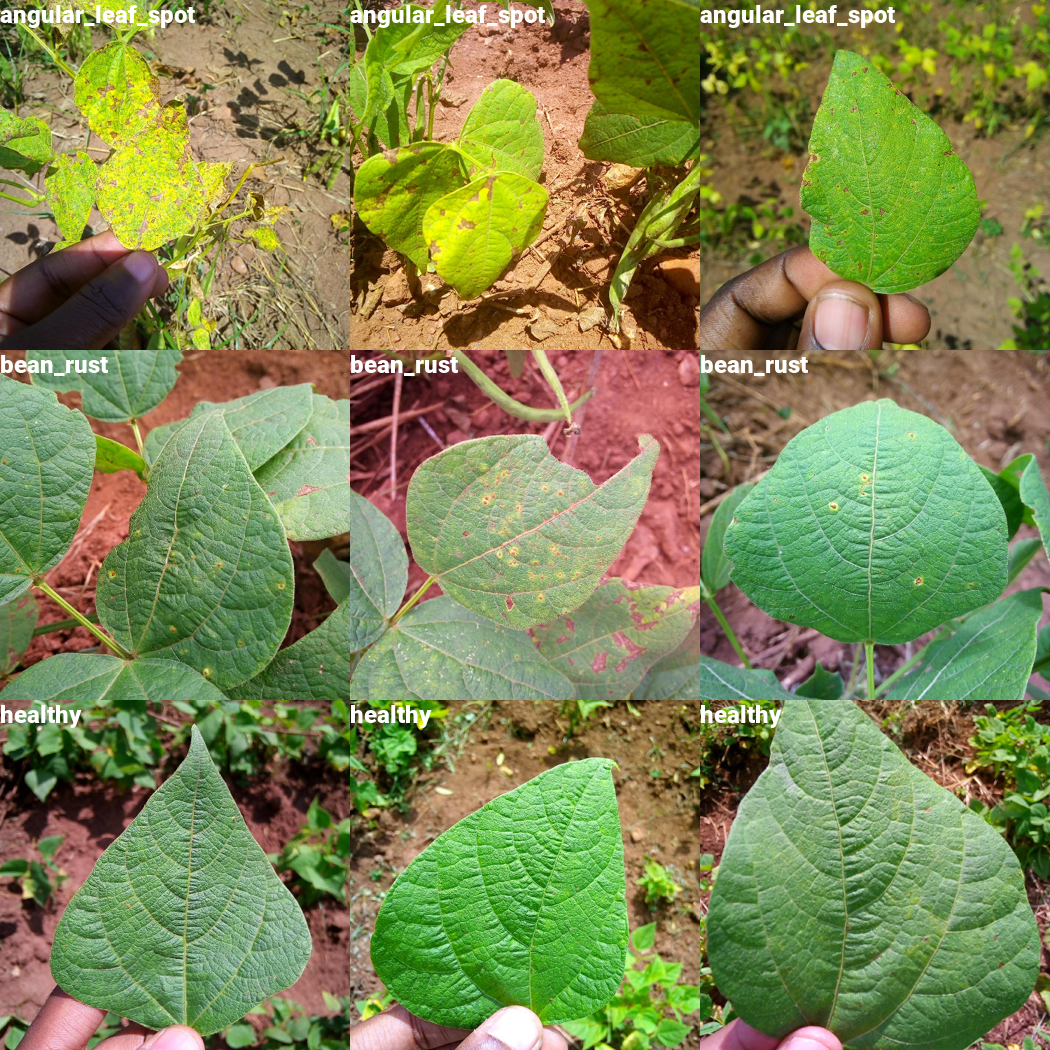

In [8]:
import random
from PIL import ImageDraw, ImageFont, Image


def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['labels'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype(
        "C:\\Users\\ChenXi\\fonts\\Roboto\\Roboto-Black.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['labels'] == label_id).shuffle(
            seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)

    return grid


show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)

In [9]:
from transformers import ViTImageProcessor


model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)
processor

ViTImageProcessor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [10]:
processor(image, return_tensors='pt')

{'pixel_values': tensor([[[[ 0.7882,  0.6706,  0.7098,  ..., -0.1922, -0.1294, -0.1765],
          [ 0.7020,  0.6000,  0.6863,  ..., -0.2863, -0.1608, -0.1608],
          [ 0.4824,  0.4039,  0.4667,  ..., -0.1922, -0.0196,  0.0275],
          ...,
          [ 0.3804,  0.5294,  0.4824,  ..., -0.8275, -0.8196, -0.8039],
          [ 0.0902,  0.3725,  0.3804,  ..., -0.8667, -0.8431, -0.8510],
          [-0.0510,  0.2784,  0.3176,  ..., -0.8588, -0.8275, -0.8275]],

         [[ 0.4902,  0.3490,  0.3804,  ..., -0.6078, -0.5373, -0.5843],
          [ 0.3569,  0.2000,  0.3176,  ..., -0.7176, -0.6000, -0.5922],
          [ 0.0431, -0.0902,  0.0510,  ..., -0.6392, -0.4745, -0.4275],
          ...,
          [-0.2235, -0.0510, -0.0902,  ..., -0.9765, -0.9608, -0.9373],
          [-0.5059, -0.2078, -0.1922,  ..., -0.9922, -0.9922, -1.0000],
          [-0.6471, -0.3020, -0.2471,  ..., -0.9843, -0.9765, -0.9843]],

         [[ 0.4353,  0.2706,  0.3098,  ..., -0.7176, -0.6392, -0.6863],
          [ 0

In [11]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [12]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[-0.5686, -0.5686, -0.5608,  ..., -0.0275,  0.1922, -0.2549],
          [-0.6078, -0.6000, -0.5843,  ..., -0.0353, -0.0196, -0.2706],
          [-0.6314, -0.6314, -0.6157,  ..., -0.2392, -0.3647, -0.2314],
          ...,
          [-0.5373, -0.5529, -0.5765,  ..., -0.0745, -0.0431, -0.0980],
          [-0.5608, -0.5765, -0.5843,  ...,  0.3176,  0.1608,  0.1294],
          [-0.5843, -0.5922, -0.6078,  ...,  0.2784,  0.1451,  0.2000]],

         [[-0.7098, -0.7098, -0.7490,  ..., -0.3725, -0.1608, -0.6000],
          [-0.7333, -0.7333, -0.7569,  ..., -0.3569, -0.3176, -0.5608],
          [-0.7490, -0.7490, -0.7647,  ..., -0.5373, -0.6627, -0.5373],
          ...,
          [-0.7725, -0.7882, -0.8196,  ..., -0.2314, -0.0353,  0.0824],
          [-0.7961, -0.8118, -0.8118,  ...,  0.1843,  0.3176,  0.3725],
          [-0.8196, -0.8196, -0.8275,  ...,  0.0745,  0.2863,  0.3961]],

         [[-0.9922, -0.9922, -1.0000,  ..., -0.5451, -0.3647, -0.7333],
          [-0

使用 `ds.map` 速度会很慢，可以调用 `processor` 采用批处理。

In [13]:
ds = load_dataset('beans')


def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']],
                       return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs

In [14]:
prepared_ds = ds.with_transform(transform)

每当从数据集中获取一个示例时，`transform` 将实时应用（同时应用于样本和切片，如下所示）。

In [15]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[-0.5686, -0.5686, -0.5608,  ..., -0.0275,  0.1922, -0.2549],
          [-0.6078, -0.6000, -0.5843,  ..., -0.0353, -0.0196, -0.2706],
          [-0.6314, -0.6314, -0.6157,  ..., -0.2392, -0.3647, -0.2314],
          ...,
          [-0.5373, -0.5529, -0.5765,  ..., -0.0745, -0.0431, -0.0980],
          [-0.5608, -0.5765, -0.5843,  ...,  0.3176,  0.1608,  0.1294],
          [-0.5843, -0.5922, -0.6078,  ...,  0.2784,  0.1451,  0.2000]],

         [[-0.7098, -0.7098, -0.7490,  ..., -0.3725, -0.1608, -0.6000],
          [-0.7333, -0.7333, -0.7569,  ..., -0.3569, -0.3176, -0.5608],
          [-0.7490, -0.7490, -0.7647,  ..., -0.5373, -0.6627, -0.5373],
          ...,
          [-0.7725, -0.7882, -0.8196,  ..., -0.2314, -0.0353,  0.0824],
          [-0.7961, -0.8118, -0.8118,  ...,  0.1843,  0.3176,  0.3725],
          [-0.8196, -0.8196, -0.8275,  ...,  0.0745,  0.2863,  0.3961]],

         [[-0.9922, -0.9922, -1.0000,  ..., -0.5451, -0.3647, -0.7333],
          [-0

In [16]:
import torch


def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [17]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")


def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

In [18]:
from transformers import ViTForImageClassification

labels = ds['train'].features['labels'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
from transformers import TrainingArguments


training_args = TrainingArguments(
    output_dir="./vit-base-beans",
    per_device_train_batch_size=16,
    evaluation_strategy="steps",
    num_train_epochs=4,
    fp16=True,
    save_steps=100,
    eval_steps=100,
    logging_steps=10,
    learning_rate=2e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to='tensorboard',
    load_best_model_at_end=True,
)

In [21]:
from transformers import Trainer
from accelerate import DataLoaderConfiguration


# 定义数据加载器配置
dataloader_config = DataLoaderConfiguration(
    dispatch_batches=None,
    split_batches=False,
    even_batches=True,
    use_seedable_sampler=True
)


trainer = Trainer(
    model=model,

    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,

    train_dataset=prepared_ds["train"],

    eval_dataset=prepared_ds["validation"],

    tokenizer=processor,

)

Train

In [22]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

  0%|          | 0/260 [00:00<?, ?it/s]

{'loss': 0.8595, 'grad_norm': 2.0383129119873047, 'learning_rate': 0.00019230769230769233, 'epoch': 0.15}
{'loss': 0.3904, 'grad_norm': 3.5644075870513916, 'learning_rate': 0.00018461538461538463, 'epoch': 0.31}
{'loss': 0.2194, 'grad_norm': 1.5718817710876465, 'learning_rate': 0.00017692307692307693, 'epoch': 0.46}
{'loss': 0.251, 'grad_norm': 1.5627355575561523, 'learning_rate': 0.00016923076923076923, 'epoch': 0.62}
{'loss': 0.1636, 'grad_norm': 2.7136075496673584, 'learning_rate': 0.00016153846153846155, 'epoch': 0.77}
{'loss': 0.2672, 'grad_norm': 6.268020153045654, 'learning_rate': 0.00015384615384615385, 'epoch': 0.92}
{'loss': 0.2014, 'grad_norm': 1.8847728967666626, 'learning_rate': 0.00014615384615384615, 'epoch': 1.08}
{'loss': 0.151, 'grad_norm': 3.7553393840789795, 'learning_rate': 0.00013846153846153847, 'epoch': 1.23}
{'loss': 0.0696, 'grad_norm': 0.46620064973831177, 'learning_rate': 0.00013076923076923077, 'epoch': 1.38}
{'loss': 0.1589, 'grad_norm': 5.769250869750977,

  0%|          | 0/17 [00:00<?, ?it/s]

{'eval_loss': 0.05960381403565407, 'eval_accuracy': 0.9849624060150376, 'eval_runtime': 0.9206, 'eval_samples_per_second': 144.467, 'eval_steps_per_second': 18.466, 'epoch': 1.54}
{'loss': 0.0769, 'grad_norm': 0.2820478677749634, 'learning_rate': 0.00011538461538461538, 'epoch': 1.69}
{'loss': 0.1252, 'grad_norm': 0.4331921935081482, 'learning_rate': 0.0001076923076923077, 'epoch': 1.85}
{'loss': 0.0683, 'grad_norm': 0.17903141677379608, 'learning_rate': 0.0001, 'epoch': 2.0}
{'loss': 0.0363, 'grad_norm': 4.753095626831055, 'learning_rate': 9.230769230769232e-05, 'epoch': 2.15}
{'loss': 0.0344, 'grad_norm': 0.08909410983324051, 'learning_rate': 8.461538461538461e-05, 'epoch': 2.31}
{'loss': 0.0165, 'grad_norm': 0.45461419224739075, 'learning_rate': 7.692307692307693e-05, 'epoch': 2.46}
{'loss': 0.0142, 'grad_norm': 0.07509640604257584, 'learning_rate': 6.923076923076924e-05, 'epoch': 2.62}
{'loss': 0.0332, 'grad_norm': 6.957741737365723, 'learning_rate': 6.153846153846155e-05, 'epoch':

  0%|          | 0/17 [00:00<?, ?it/s]

{'eval_loss': 0.012948516756296158, 'eval_accuracy': 1.0, 'eval_runtime': 0.8931, 'eval_samples_per_second': 148.921, 'eval_steps_per_second': 19.035, 'epoch': 3.08}
{'loss': 0.0122, 'grad_norm': 0.060628462582826614, 'learning_rate': 3.846153846153846e-05, 'epoch': 3.23}
{'loss': 0.0116, 'grad_norm': 0.058878228068351746, 'learning_rate': 3.0769230769230774e-05, 'epoch': 3.38}
{'loss': 0.0113, 'grad_norm': 0.060567647218704224, 'learning_rate': 2.307692307692308e-05, 'epoch': 3.54}
{'loss': 0.0111, 'grad_norm': 0.06647365540266037, 'learning_rate': 1.5384615384615387e-05, 'epoch': 3.69}
{'loss': 0.0108, 'grad_norm': 0.0634729415178299, 'learning_rate': 7.692307692307694e-06, 'epoch': 3.85}
{'loss': 0.0108, 'grad_norm': 0.059498630464076996, 'learning_rate': 0.0, 'epoch': 4.0}
{'train_runtime': 65.3459, 'train_samples_per_second': 63.294, 'train_steps_per_second': 3.979, 'train_loss': 0.12561390772461892, 'epoch': 4.0}
***** train metrics *****
  epoch                    =        4.0
 

Evaluate

In [23]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

  0%|          | 0/17 [00:00<?, ?it/s]

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =        1.0
  eval_loss               =     0.0129
  eval_runtime            = 0:00:01.17
  eval_samples_per_second =    112.916
  eval_steps_per_second   =     14.433
